In [ ]:
# Imports
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from google.colab import drive
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPool2D, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading the Dataset
data = pd.read_csv("/content/drive/My Drive/Mosaic ps1 datasets/Dataset 3.csv").astype('float32')
print(data.head(10))

       0      1      2      3      4      5      6      7      8      9  ...  \
0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  ...   
1  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  ...   
2  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  ...   
3  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  ...   
4  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  ...   
5  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  ...   
6  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  ...   
7  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  ...   
8  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  ...   
9  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  ...   

     775    776    777    778    779    780    781    782    783  Label  
0  255.0  255.0  255.0  255.0  255.0  255.0  

In [ ]:
# Dropping characters
drop_rows = [11, 12, 16, 18, 19, 20, 21, 22, 24, 26, 31, 32, 33, 34, 37, 40, 41, 44]
data = data[data['Label'].isin(drop_rows) == False]
data.index= range(len(data))

In [ ]:
data['Label'].value_counts()

5.0     2600
7.0     2550
6.0     2550
4.0     2550
2.0     2550
3.0     2500
1.0     2450
43.0    2400
27.0    2400
10.0    2400
39.0    2400
38.0    2400
36.0    2400
23.0    2400
28.0    2400
35.0    2400
25.0    2400
29.0    2400
14.0    2400
17.0    2400
13.0    2400
46.0    2400
42.0    2400
15.0    2400
30.0    2400
45.0    2399
Name: Label, dtype: int64

In [ ]:
# Creating dictionary for all characters left
dic = {1: 0,2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6,10: 7,13: 8,14: 9,15: 10,17: 11,23: 12,25: 13,27: 14,28: 15,29: 16,30: 17, 35: 18,36: 19,38: 20,39: 21,42: 22,43: 23,45: 24,46: 25}
data['Label']=data['Label'].map(dic)

In [ ]:
# Stroing data and result in x and y respectively
y = data['Label']
X = data.drop('Label',axis = 1)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
2,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
3,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
4,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63344,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
63345,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
63346,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
63347,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


In [ ]:
train_x = X
train_y = y
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
print("Train data shape: ", train_x.shape)

Train data shape:  (63349, 28, 28)


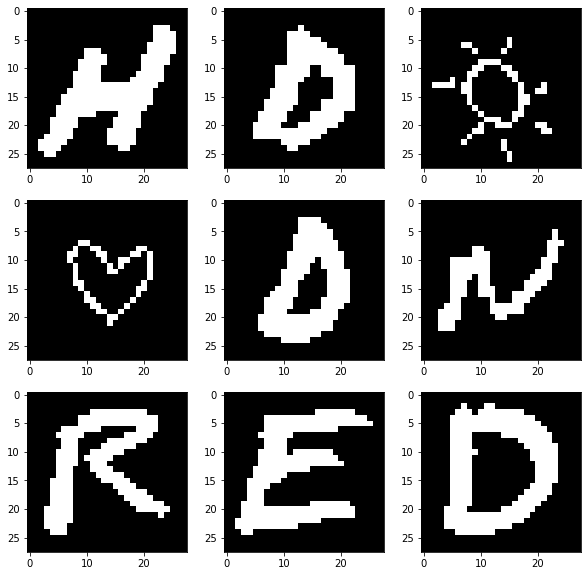

In [ ]:
# Plotting data
shuff = shuffle(train_x[:])
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [ ]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

New shape of train data:  (63349, 28, 28, 1)


In [ ]:
train_y.head(5)

0    19
1    23
2    10
3    22
4    25
Name: Label, dtype: int64

In [ ]:
train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

New shape of train labels:  (63349, 26)


In [ ]:
# Model
model=Sequential()
model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size = 4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(26, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_7 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_8 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 32)        25632     
                                                                 
 batch_normalization_9 (Batc  (None, 12, 12, 32)      

In [ ]:
# Model Training
history = model.fit(train_X, train_yOHE, epochs=30)

Epoch 1/30
1980/1980 [==============================] - 31s 15ms/step - loss: 0.5044 - accuracy: 0.8610
Epoch 2/30
1980/1980 [==============================] - 26s 13ms/step - loss: 0.1856 - accuracy: 0.9498
Epoch 3/30
1980/1980 [==============================] - 26s 13ms/step - loss: 0.1517 - accuracy: 0.9592
Epoch 4/30
1980/1980 [==============================] - 26s 13ms/step - loss: 0.1337 - accuracy: 0.9650
Epoch 5/30
1980/1980 [==============================] - 26s 13ms/step - loss: 0.1193 - accuracy: 0.9685
Epoch 6/30
1980/1980 [==============================] - 26s 13ms/step - loss: 0.1081 - accuracy: 0.9720
Epoch 7/30
1980/1980 [==============================] - 27s 13ms/step - loss: 0.1015 - accuracy: 0.9737
Epoch 8/30
1980/1980 [==============================] - 27s 13ms/step - loss: 0.0947 - accuracy: 0.9753
Epoch 9/30
1980/1980 [==============================] - 26s 13ms/step - loss: 0.0896 - accuracy: 0.9772
Epoch 10/30
1980/1980 [==============================] - 26s 13m

In [ ]:
# Saving the Model
model.summary() 
model.save(r'model.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_7 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_8 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 32)        25632     
                                                                 
 batch_normalization_9 (Batc  (None, 12, 12, 32)      

In [ ]:
# Printing Model accuracy
print("The training accuracy is :", history.history['accuracy'])
print("The training loss is :", history.history['loss'])

The training accuracy is : [0.8609922528266907, 0.9498176574707031, 0.9591943025588989, 0.9649560451507568, 0.9684604406356812, 0.971980631351471, 0.9737012386322021, 0.9753271341323853, 0.977189838886261, 0.9784053564071655, 0.9796366095542908, 0.9800154566764832, 0.9807889461517334, 0.9819570779800415, 0.981972873210907, 0.9827937483787537, 0.9831410050392151, 0.9837092757225037, 0.984151303768158, 0.9848458766937256, 0.9849405884742737, 0.9854772686958313, 0.9857140779495239, 0.9854456782341003, 0.9861876368522644, 0.9865348935127258, 0.9863454699516296, 0.9868980050086975, 0.9869137406349182, 0.9873083829879761]
The training loss is : [0.504442036151886, 0.1856319159269333, 0.15167340636253357, 0.13365881145000458, 0.11930288374423981, 0.10806269198656082, 0.10153697431087494, 0.0947011262178421, 0.08961794525384903, 0.08414848893880844, 0.078708715736866, 0.07655134797096252, 0.07261747121810913, 0.0694127306342125, 0.06823378056287766, 0.06469455361366272, 0.06294742971658707, 0.